--------------------------
#### Image compression and Image classification
--------------------------
- load training images
- visualize a few sample images

In [27]:
import os
import random
from skimage import io
from skimage import io, transform
import matplotlib.pyplot as plt

In [34]:
# Function to load, resize, and check the sizes of random images
def load_and_resize_images(image_dir, num_images=20, target_size=(64, 64)):
    # List all files in the directory
    all_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, file))]

    # Check if there are enough images to sample
    if len(all_files) < num_images:
        raise ValueError("Not enough images in the directory to sample")
               
    else:
        # Randomly select the specified number of images
        selected_files = random.sample(all_files, num_images)
    
    # Load, resize, and check the sizes of the selected images
    resized_images = []
    for file in selected_files:
        img = io.imread(file)
        img_resized = transform.resize(img, target_size, anti_aliasing=True)
        resized_images.append(img_resized)
        print(f"Original Size: {img.shape}, Resized Size: {img_resized.shape}")

    return selected_files, resized_images

In [35]:
# Specify the path to your image directory
image_dir = r'D:\AI-DATASETS\02-MISC-large\keras\datasets\cats-dogs-data-LARGE\train\training_data'  # Replace with your dataset path

In [36]:
# Load, resize, and check the sizes of random images
try:
    selected_files, resized_images = load_and_resize_images(image_dir, num_images=20, target_size=(64, 64))
except ValueError as e:
    print(e)

Original Size: (294, 419, 3), Resized Size: (64, 64, 3)
Original Size: (500, 374, 3), Resized Size: (64, 64, 3)
Original Size: (384, 500, 3), Resized Size: (64, 64, 3)
Original Size: (462, 499, 3), Resized Size: (64, 64, 3)
Original Size: (333, 499, 3), Resized Size: (64, 64, 3)
Original Size: (374, 500, 3), Resized Size: (64, 64, 3)
Original Size: (499, 389, 3), Resized Size: (64, 64, 3)
Original Size: (374, 500, 3), Resized Size: (64, 64, 3)
Original Size: (225, 299, 3), Resized Size: (64, 64, 3)
Original Size: (165, 233, 3), Resized Size: (64, 64, 3)
Original Size: (334, 499, 3), Resized Size: (64, 64, 3)
Original Size: (300, 221, 3), Resized Size: (64, 64, 3)
Original Size: (260, 339, 3), Resized Size: (64, 64, 3)
Original Size: (375, 499, 3), Resized Size: (64, 64, 3)
Original Size: (500, 232, 3), Resized Size: (64, 64, 3)
Original Size: (374, 500, 3), Resized Size: (64, 64, 3)
Original Size: (401, 285, 3), Resized Size: (64, 64, 3)
Original Size: (329, 396, 3), Resized Size: (64,

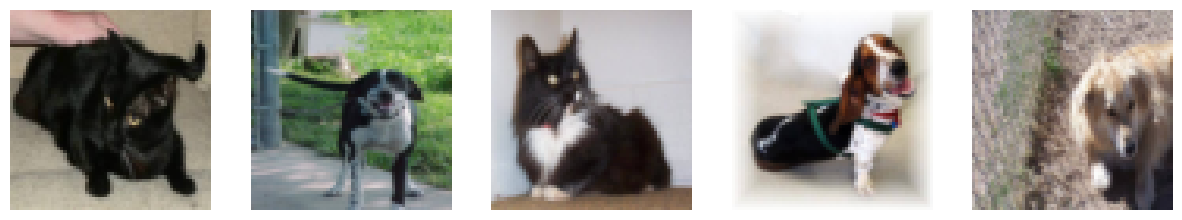

In [37]:
# Display the first 5 resized images as a sanity check
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax, img_resized in zip(axes, resized_images[:5]):
    ax.imshow(img_resized, cmap='gray')
    ax.axis('off')
plt.show()

#### resize the images

In [55]:
# Function to load, resize, and check the sizes of random images
def load_and_resize_all_images(image_dir, target_size=(64, 64)):
    # List all files in the directory
    all_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, file))]
  
    # Load, resize, and check the sizes of the selected images
    resized_images = []
    for file in all_files:
        img = io.imread(file, as_gray=True)  # Load image in grayscale
        img_resized = transform.resize(img, target_size, anti_aliasing=True)
        resized_images.append(img_resized)
        #print(f"Original Size: {img.shape}, Resized Size: {img_resized.shape}")

    return resized_images

In [93]:
# Load and resize images
resized_images_gray = load_and_resize_all_images(image_dir, target_size=(128, 128))

In [78]:
len(resized_images_gray)

1500

In [79]:
resized_images_gray[0].shape

(128, 128)

In [80]:
import numpy as np
from sklearn.decomposition import PCA

In [94]:
# Convert the list to a numpy array
reshaped_images = np.array(resized_images_gray)

In [105]:
%%time
# Perform PCA
pca = PCA(n_components=0.99)  # Set the explained variance ratio to 90%
reshaped_images_flattened = reshaped_images.reshape(len(resized_images_gray), -1)
pca.fit(reshaped_images_flattened)

Wall time: 40.1 s


PCA(n_components=0.99)

In [106]:
pca.n_components_

913

In [107]:
# Select a random subset of images
random_indices = random.sample(range(len(reshaped_images_flattened)), 10)

# Select the reduced dimension version
reduced_images_sample = pca.transform(reshaped_images_flattened[random_indices])

# Reconstruct images from principal components
reconstructed_images_sample_flattened = pca.inverse_transform(reduced_images_sample)

# Reshape the flattened images back to their original shape
# Here, the original shape should be (128, 128), as that was the size we resized the images to
reconstructed_images_sample = reconstructed_images_sample_flattened.reshape(len(reduced_images_sample), 128, 128)


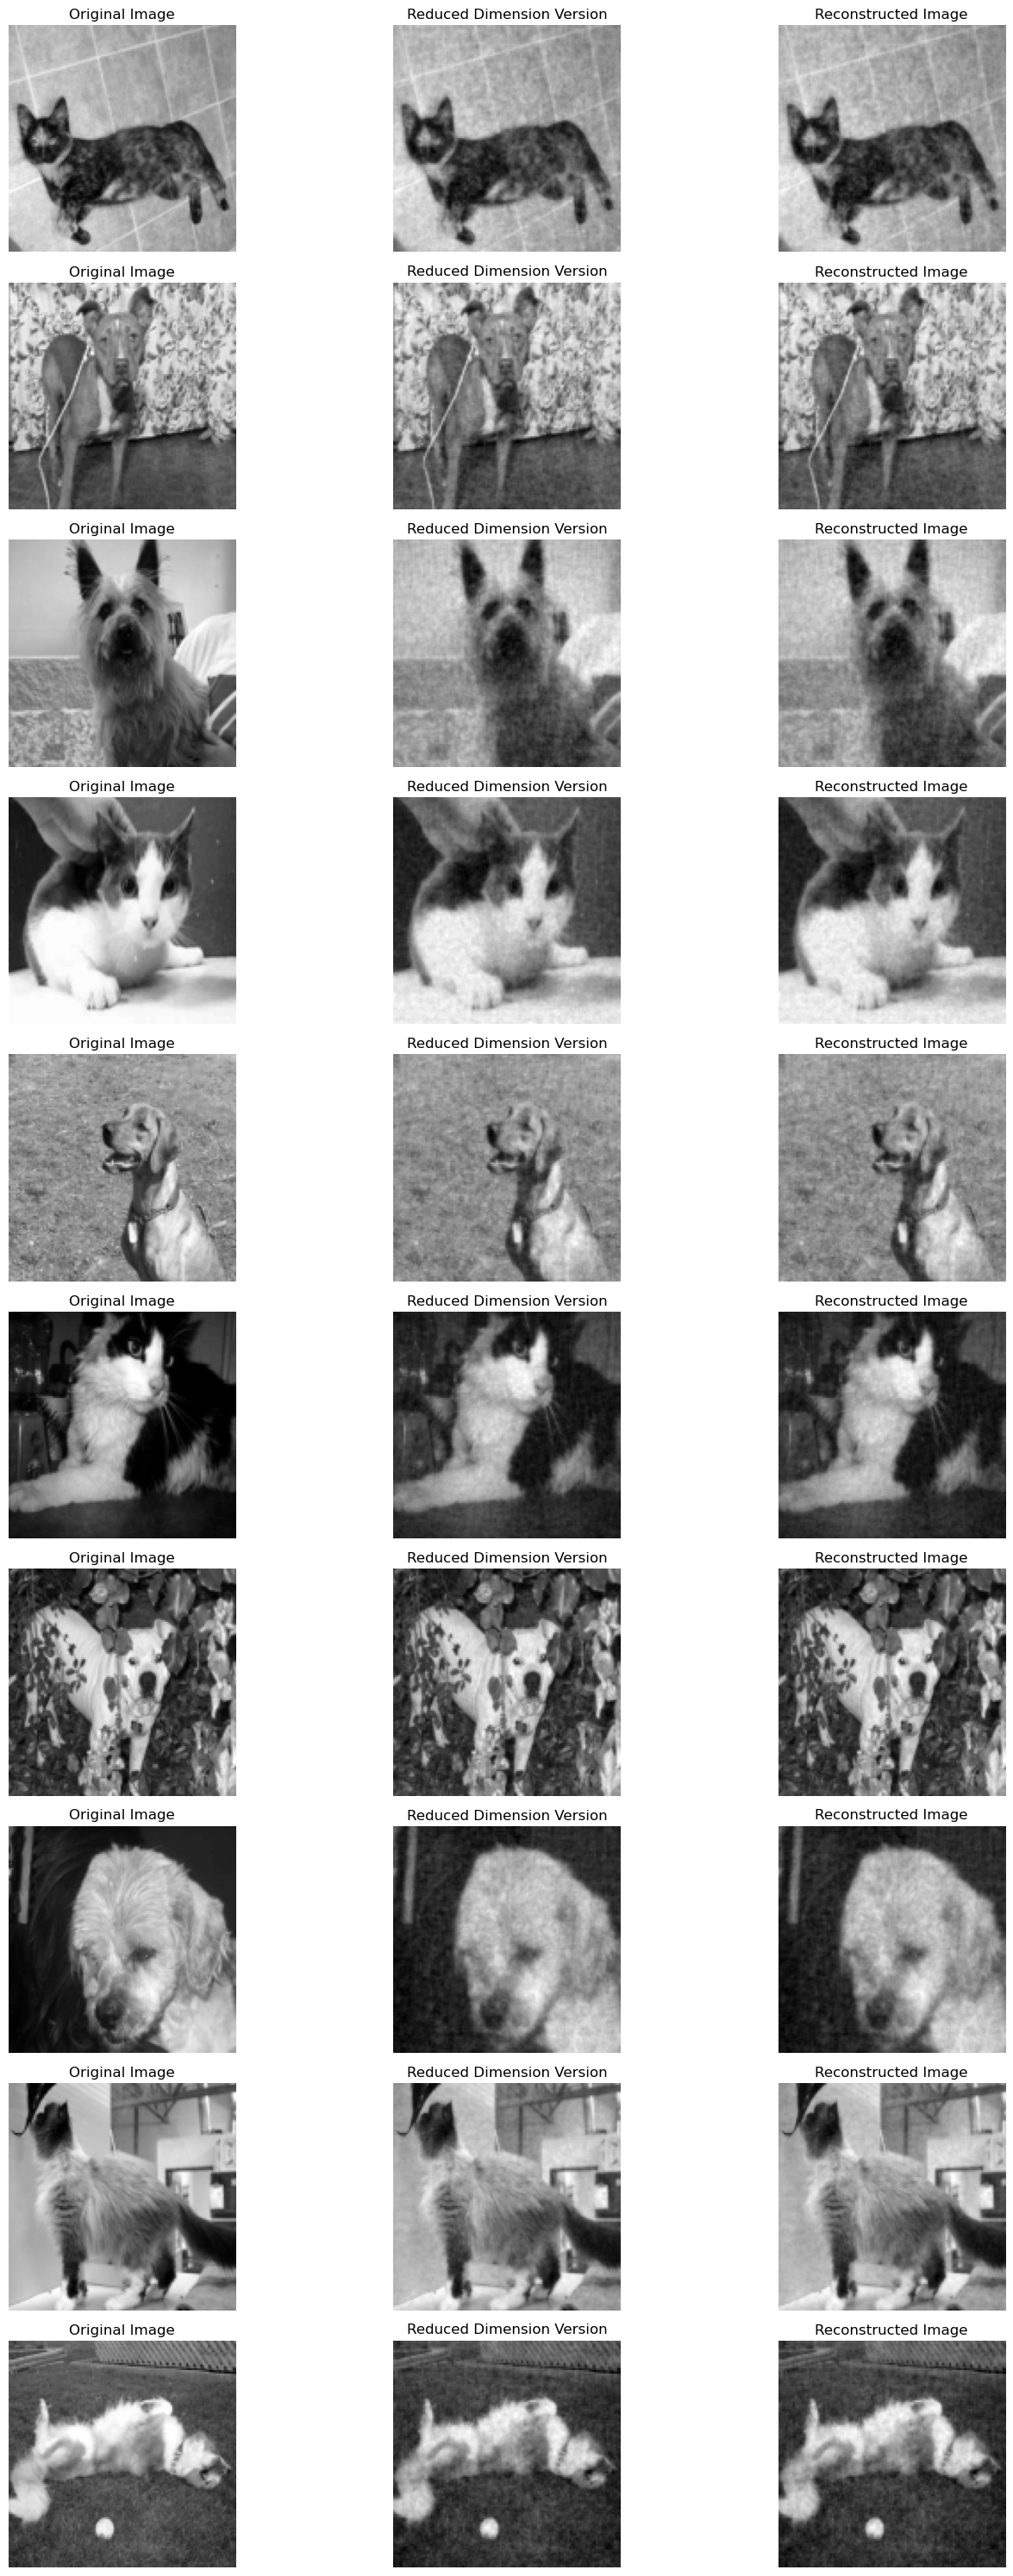

In [108]:
# Plot the original, reduced dimension, and reconstructed versions for each image
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(15, 30))

for i, idx in enumerate(random_indices):
    # Original Image
    axes[i, 0].imshow(reshaped_images[idx], cmap='gray')
    axes[i, 0].set_title('Original Image')
    axes[i, 0].axis('off')
    
    # Reduced Dimension Version
    axes[i, 1].imshow(pca.inverse_transform(reduced_images_sample[i]).reshape(128, 128), cmap='gray')
    axes[i, 1].set_title('Reduced Dimension Version')
    axes[i, 1].axis('off')

    # Reconstructed Version
    axes[i, 2].imshow(reconstructed_images_sample[i], cmap='gray')
    axes[i, 2].set_title('Reconstructed Image')
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()